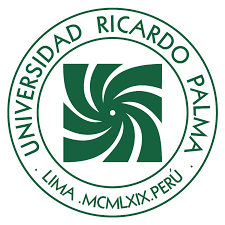

Maestría: Ciencia de los Datos 
Curso: Tesis III

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_df = pd.read_csv('D:\TesisFinalJulio\DatasetSedapal_CSV.csv', sep=',', encoding='ISO-8859-1')


In [14]:
data_df.head()

,OFICINA,NIS,CALLE,URBANIZA,DISTRITO,RUTA,ITIN,CICLO,SECTOR,BASE_PTO_LOTE_X,BASE_PTO_LOTE_Y,CONV_PTO_LOTE_X,CONV_PTO_LOTE_Y,CONV_PTO_MZ_X,CONV_PTO_MZ_Y,NOMBRE,TIEMPO_MIN,TIEMPO_MIN_ROUND,LEC_EXITOSA
0,4111,2547173,AV ANGAMOS OESTE,URB MIRAFLORES,18,18,12,1,54,-12.188828,-77.010623,-12.114293,-77.036277,-12.114429,-77.036358,"FLORES MONTENEGRO,VICTOR MANUEL","15,93",16,0
1,4111,2819138,AV ANGAMOS OESTE,URB MIRAFLORES,18,18,12,1,54,-12.188828,-77.010623,-12.114293,-77.036277,-12.114429,-77.036358,INMOBILIARIA SANDRA S.A.,"15,93",16,0
2,4111,5518477,AV ANGAMOS OESTE,URB MIRAFLORES,18,18,12,1,54,-12.188828,-77.010623,-12.114293,-77.036277,-12.114429,-77.036358,INMOBILIARIA SANDRA S.A.,"15,93",16,0
3,4111,5518478,AV ANGAMOS OESTE,URB MIRAFLORES,18,18,12,1,54,-12.188828,-77.010623,-12.114293,-77.036277,-12.114429,-77.036358,INMOBILIARIA SANDRA S.A.,"15,93",16,0
4,4111,5518479,AV ANGAMOS OESTE,URB MIRAFLORES,18,18,12,1,54,-12.188828,-77.010623,-12.114293,-77.036277,-12.114429,-77.036358,INMOBILIARIA SANDRA S.A.,"15,93",16,0


In [15]:
# Eliminando todos los valores nulos
data_df.dropna(inplace = True)

In [16]:
data_df.drop(['CALLE', 'URBANIZA', 'BASE_PTO_LOTE_X', 'BASE_PTO_LOTE_Y', 'CONV_PTO_LOTE_X', 'CONV_PTO_LOTE_Y', 'CONV_PTO_MZ_X', 'CONV_PTO_MZ_Y', 'NOMBRE', 'TIEMPO_MIN'], axis =1, inplace = True)


In [17]:
# Convierte 'LEC_EXITOSA' en nùmerico
data_df['LEC_EXITOSA'] = data_df['LEC_EXITOSA'].astype(int)

In [18]:
# Sumar la cantidar de valores perdidos según variables
data_df.isnull().sum()

OFICINA             0
NIS                 0
DISTRITO            0
RUTA                0
ITIN                0
CICLO               0
SECTOR              0
TIEMPO_MIN_ROUND    0
LEC_EXITOSA         0
dtype: int64

KNN

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data_df.drop(columns=['LEC_EXITOSA'])
y = data_df['LEC_EXITOSA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(1, 21), 
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

results = []

grid = GridSearchCV(knn, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Iterar sobre los resultados y guardar en el DataFrame
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    knn_model = KNeighborsRegressor(**params)
    knn_model.fit(X_train, y_train) 
    y_pred = knn_model.predict(X_test)
    
    # Calcular métricas de rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'model': 'K-Nearest Neighbors',
        'params': params,
        'MSE': mse,
        'R2': r2
    })

results_df = pd.DataFrame(results)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros:', grid.best_params_)
print(results_df)

ruta_guardado = r'D:\\TesisFinalJulio\\resultados_modelo_KNN.csv'
results_df.to_csv(ruta_guardado, index=False)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Mejores hiperparámetros: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
                  model                                             params  \
0   K-Nearest Neighbors   {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}   
1   K-Nearest Neighbors  {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}   
2   K-Nearest Neighbors   {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}   
3   K-Nearest Neighbors  {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}   
4   K-Nearest Neighbors   {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}   
..                  ...                                                ...   
75  K-Nearest Neighbors  {'n_neighbors': 19, 'p': 2, 'weights': 'distan...   
76  K-Nearest Neighbors  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}   
77  K-Nearest Neighbors  {'n_neighbors': 20, 'p': 1, 'weights': 'distan...   
78  K-Nearest Neighbors  {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}   
79  K-

In [32]:
results_df

,model,params,MSE,R2
0,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.040000,0.385561
1,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.040000,0.385561
2,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.040000,0.385561
3,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.040000,0.385561
4,K-Nearest Neighbors,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.045000,0.308756
...,...,...,...,...
75,K-Nearest Neighbors,"{'n_neighbors': 19, 'p': 2, 'weights': 'distan...",0.043051,0.338692
76,K-Nearest Neighbors,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.054425,0.163978
77,K-Nearest Neighbors,"{'n_neighbors': 20, 'p': 1, 'weights': 'distan...",0.043030,0.339011
78,K-Nearest Neighbors,"{'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}",0.054425,0.163978


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
results_df_csv = pd.read_csv('D:\\TesisFinalJulio\\_resultados_modelo_KNN.csv', sep=',')

In [34]:
results_df_csv

,model,params,MSE,R2
0,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.040000,0.385561
1,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.040000,0.385561
2,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.040000,0.385561
3,K-Nearest Neighbors,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.040000,0.385561
4,K-Nearest Neighbors,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.045000,0.308756
...,...,...,...,...
75,K-Nearest Neighbors,"{'n_neighbors': 19, 'p': 2, 'weights': 'distan...",0.043051,0.338692
76,K-Nearest Neighbors,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.054425,0.163978
77,K-Nearest Neighbors,"{'n_neighbors': 20, 'p': 1, 'weights': 'distan...",0.043030,0.339011
78,K-Nearest Neighbors,"{'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}",0.054425,0.163978


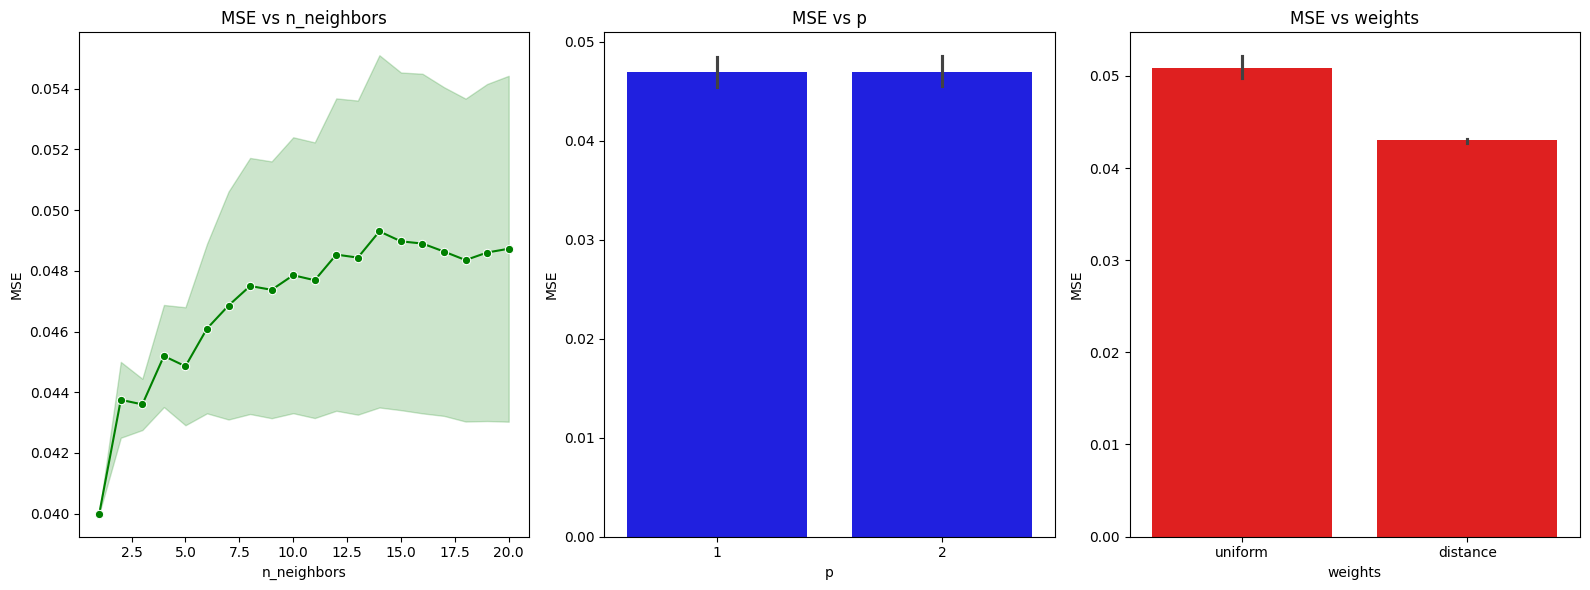

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv[results_df_csv['model'] == 'K-Nearest Neighbors'].copy()

knn_df['n_neighbors'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['n_neighbors'])
knn_df['p'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('p', None))
knn_df['weights'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('weights', None))

# Graficar la tendencia del MSE en función de 'n_neighbors', 'p' y 'weights'
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x='n_neighbors', y='MSE', data=knn_df, marker='o', color='green') 
plt.title('MSE vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
sns.barplot(x='p', y='MSE', data=knn_df, color='blue') 
plt.title('MSE vs p')
plt.xlabel('p')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
sns.barplot(x='weights', y='MSE', data=knn_df, color='red')
plt.title('MSE vs weights')
plt.xlabel('weights')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()



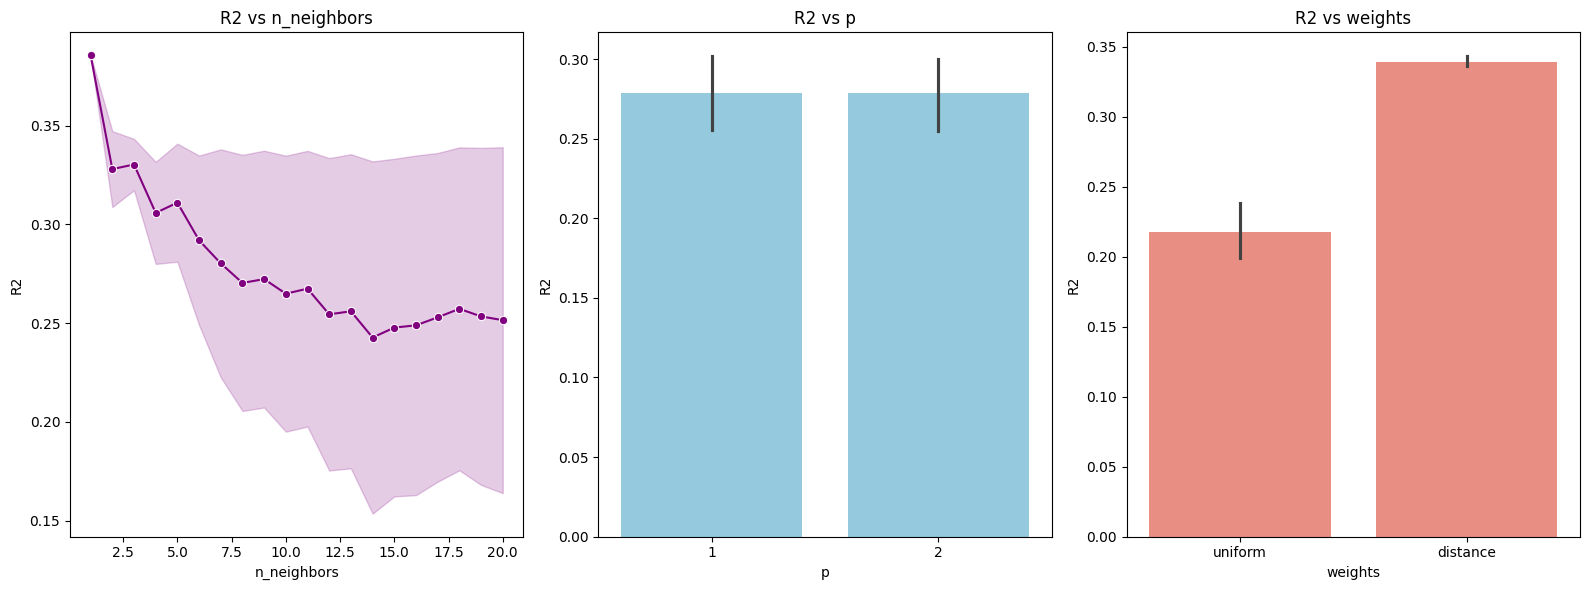

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df[results_df['model'] == 'K-Nearest Neighbors'].copy()

# Extraer los valores de 'n_neighbors', 'p' y 'weights' de los parámetros
knn_df['n_neighbors'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['n_neighbors'])
knn_df['p'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('p', None))
knn_df['weights'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('weights', None))

# Graficar la tendencia del R2 en función de 'n_neighbors', 'p' y 'weights'
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x='n_neighbors', y='R2', data=knn_df, marker='o', color='purple')
plt.title('R2 vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('R2')

plt.subplot(1, 3, 2)
sns.barplot(x='p', y='R2', data=knn_df, color='skyblue')
plt.title('R2 vs p')
plt.xlabel('p')
plt.ylabel('R2')

plt.subplot(1, 3, 3)
sns.barplot(x='weights', y='R2', data=knn_df, color='salmon')
plt.title('R2 vs weights')
plt.xlabel('weights')
plt.ylabel('R2')

plt.tight_layout()
plt.show()



Lasso (Lasso)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data_df.drop(columns=['LEC_EXITOSA'])
y = data_df['LEC_EXITOSA']

# Separando entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiendo el modelo
lasso = Lasso()

# Definiendo los hiperparámetros a probar
param_grid = {
    'alpha': np.logspace(-4, 0, 20),
    'max_iter': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
}

# Crear un DataFrame para almacenar los resultados de cada iteración
results = []

# GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid = GridSearchCV(lasso, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Iterar sobre los resultados y guardar en el DataFrame
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    lasso_model = Lasso(**params)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    
    # Calcular métricas de rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'model': 'Lasso Regression',
        'params': params,
        'MSE': mse,
        'R2': r2
    })

results_df = pd.DataFrame(results)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros:', grid.best_params_)

# Mostrar los resultados completos
print(results_df)

ruta_guardado = r'D:\TesisFinalJulio\resultados_modelo_Lasso.csv'
results_df.to_csv(ruta_guardado, index=False)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejores hiperparámetros: {'alpha': 0.007847599703514606, 'max_iter': 1000}
                model                               params       MSE        R2
0    Lasso Regression  {'alpha': 0.0001, 'max_iter': 1000}  0.061139  0.060843
1    Lasso Regression  {'alpha': 0.0001, 'max_iter': 2000}  0.061139  0.060843
2    Lasso Regression  {'alpha': 0.0001, 'max_iter': 3000}  0.061139  0.060843
3    Lasso Regression  {'alpha': 0.0001, 'max_iter': 4000}  0.061139  0.060843
4    Lasso Regression  {'alpha': 0.0001, 'max_iter': 5000}  0.061139  0.060843
..                ...                                  ...       ...       ...
195  Lasso Regression     {'alpha': 1.0, 'max_iter': 6000}  0.065222 -0.001869
196  Lasso Regression     {'alpha': 1.0, 'max_iter': 7000}  0.065222 -0.001869
197  Lasso Regression     {'alpha': 1.0, 'max_iter': 8000}  0.065222 -0.001869
198  Lasso Regression     {'alpha': 1.0, 'max_iter': 9000}  0.065222 -0

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
results_df_csv = pd.read_csv('D:\TesisFinalJulio\_resultados_modelo_Lasso_.csv', sep=';')

In [93]:
results_df_csv

,model,params,MSE,R2
0,Lasso Regression,"{'alpha': 0.08858667904100823, 'max_iter': 1000}",0.065222,0.004702
1,Lasso Regression,"{'alpha': 0.08858667904100823, 'max_iter': 2000}",0.065222,0.004702
2,Lasso Regression,"{'alpha': 0.08858667904100823, 'max_iter': 3000}",0.065222,0.004702
3,Lasso Regression,"{'alpha': 0.08858667904100823, 'max_iter': 4000}",0.065222,0.004702
4,Lasso Regression,"{'alpha': 0.08858667904100823, 'max_iter': 5000}",0.065222,0.004702
...,...,...,...,...
195,Lasso Regression,"{'alpha': 0.0018329807108324356, 'max_iter': 6...",0.061124,0.061082
196,Lasso Regression,"{'alpha': 0.0018329807108324356, 'max_iter': 7...",0.061124,0.061082
197,Lasso Regression,"{'alpha': 0.0018329807108324356, 'max_iter': 8...",0.061124,0.061082
198,Lasso Regression,"{'alpha': 0.0018329807108324356, 'max_iter': 9...",0.061124,0.061082


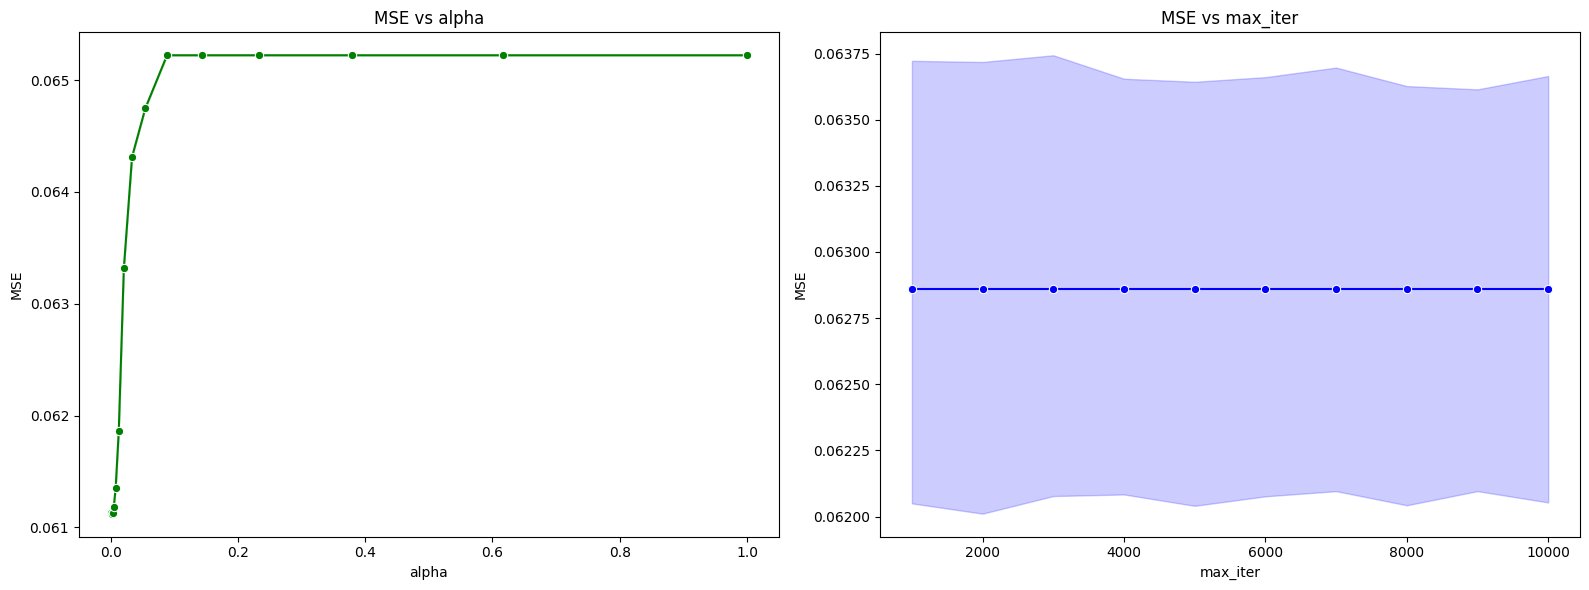

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv[results_df_csv['model'] == 'Lasso Regression'].copy()

# Extraer los valores de 'n_neighbors', 'p' y 'weights' de los parámetros
knn_df['alpha'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['alpha'])
knn_df['max_iter'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('max_iter', None))

# Graficar la tendencia del MSE en función de 'n_neighbors', 'p' y 'weights'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='alpha', y='MSE', data=knn_df, marker='o', color='green')
plt.title('MSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
sns.lineplot(x='max_iter', y='MSE', data=knn_df, marker='o', color='blue')

plt.title('MSE vs max_iter')
plt.xlabel('max_iter')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

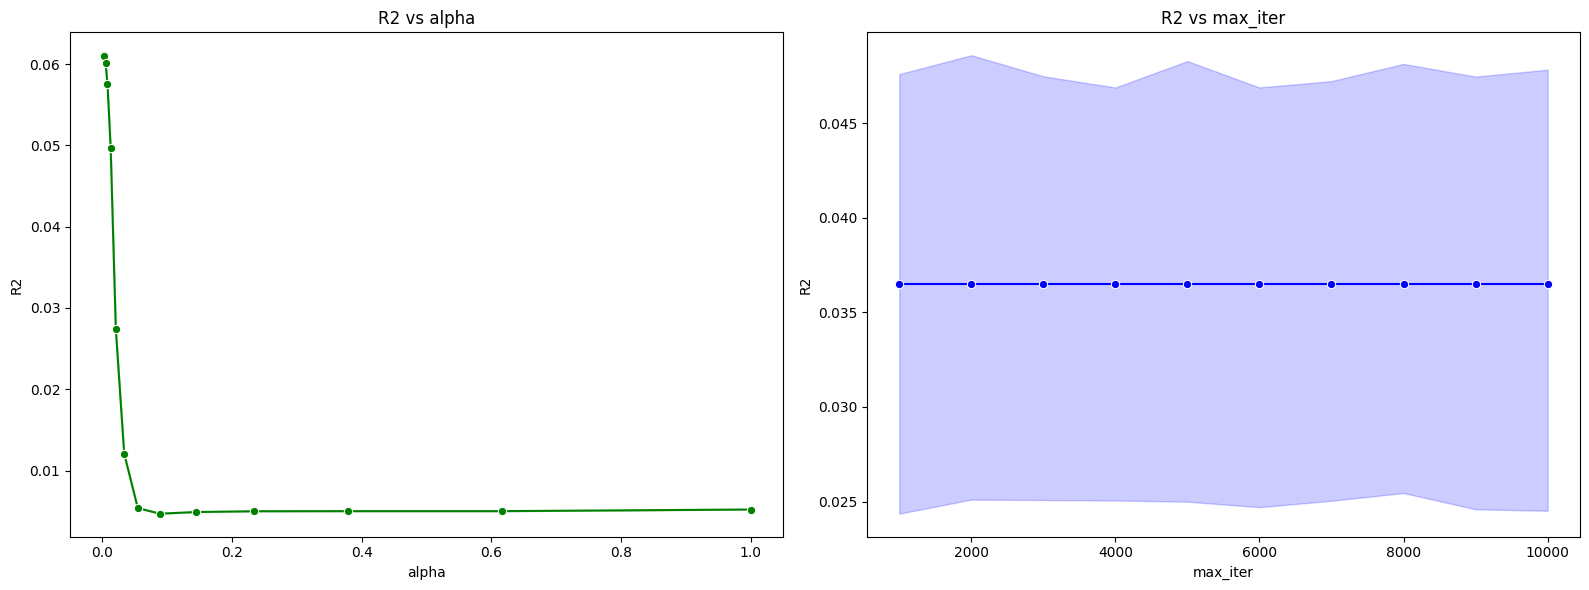

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv[results_df_csv['model'] == 'Lasso Regression'].copy()

# Extraer los valores de 'n_neighbors', 'p' y 'weights' de los parámetros
knn_df['alpha'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['alpha'])
knn_df['max_iter'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('max_iter', None))

# Graficar la tendencia del MSE en función de 'n_neighbors', 'p' y 'weights'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='alpha', y='R2', data=knn_df, marker='o', color='green')
plt.title('R2 vs alpha')
plt.xlabel('alpha')
plt.ylabel('R2')

plt.subplot(1, 2, 2)
sns.lineplot(x='max_iter', y='R2', data=knn_df, marker='o', color='blue')
plt.title('R2 vs max_iter')
plt.xlabel('max_iter')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

Random Forest (RandomForestRegressor)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data_df.drop(columns=['LEC_EXITOSA'])
y = data_df['LEC_EXITOSA']

# Separando entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiendo el modelo Random Forest
rf = RandomForestRegressor()

# Definiendo los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}

# GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid = GridSearchCV(rf, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

# Ajustando el modelo
grid.fit(X_train, y_train)

# Crear un DataFrame para almacenar los resultados de cada iteración
results = []

# Iterar sobre los resultados y guardar en el DataFrame
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    rf_model = RandomForestRegressor(**params) 
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'model': 'Random Forest',
        'params': params,
        'MSE': mse,
        'R2': r2
    })

results_df = pd.DataFrame(results)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros:', grid.best_params_)

# Mostrar los resultados completos
print(results_df)

ruta_guardado = r'D:\TesisFinalJulio\resultados_modelo_RandomForestRegressor.csv'
results_df.to_csv(ruta_guardado, index=False)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
             model                                             params  \
0    Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
1    Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
2    Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
3    Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
4    Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
..             ...                                                ...   
103  Random Forest  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...   
104  Random Forest  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...   
105  Random Forest  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...   
106  Random Forest  {'max_depth': 30, 'min_samples_leaf': 4, 'min_...   
107  Random Forest  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
results_df_csv = pd.read_csv('D:\TesisFinalJulio\_resultados_modelo_RandomForestRegressor.csv', sep=',')

In [10]:
results_df_csv

,mean_test_score,params,MSE,R2
0,0.534707,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.040000,0.385561
1,0.502068,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.035556,0.453832
2,0.532013,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.036432,0.440361
3,0.497647,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.034800,0.465441
4,0.560892,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.038056,0.415429
...,...,...,...,...
95,0.574542,"{'max_depth': 40, 'min_samples_leaf': 6, 'min_...",0.041196,0.367187
96,0.492087,"{'max_depth': 40, 'min_samples_leaf': 8, 'min_...",0.043377,0.333692
97,0.492087,"{'max_depth': 40, 'min_samples_leaf': 8, 'min_...",0.043377,0.333692
98,0.492087,"{'max_depth': 40, 'min_samples_leaf': 8, 'min_...",0.043377,0.333692


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
results_df_csv = pd.read_csv('D:\TesisFinalJulio\_resultados_modelo_RandomForestRegressor.csv', sep=',')

In [36]:
results_df_csv

,model,params,MSE,R2
0,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.040765,0.373810
1,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.041088,0.368852
2,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.040491,0.378015
3,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.040781,0.373562
4,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.040130,0.383570
...,...,...,...,...
103,Random Forest,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.041661,0.360050
104,Random Forest,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.041013,0.370000
105,Random Forest,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.041468,0.363004
106,Random Forest,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.041060,0.369282


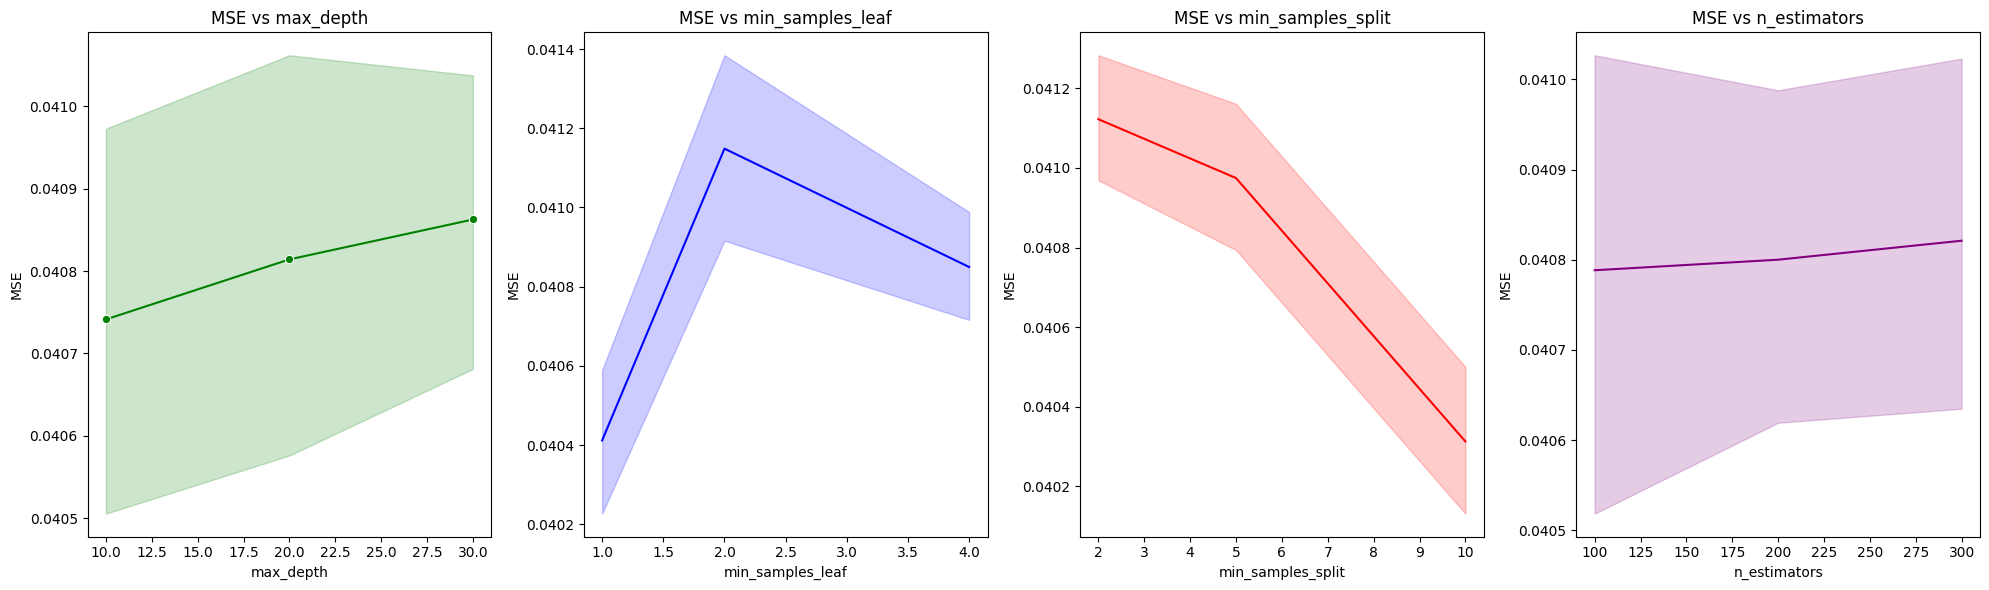

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv.copy()

# Extraer los valores de 'max_depth', 'min_samples_leaf', 'min_samples_split' y 'n_estimators' de los parámetros
knn_df['max_depth'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['max_depth'])
knn_df['min_samples_leaf'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_leaf', None))
knn_df['min_samples_split'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_split', None))
knn_df['n_estimators'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('n_estimators', None))

# Graficar la tendencia del MSE en función de 'max_depth', 'min_samples_leaf', 'min_samples_split' y 'n_estimators'
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.lineplot(x='max_depth', y='MSE', data=knn_df, marker='o', color='green')
plt.title('MSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')

plt.subplot(1, 4, 2)
sns.lineplot(x='min_samples_leaf', y='MSE', data=knn_df, color='blue')
plt.title('MSE vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')

plt.subplot(1, 4, 3)
sns.lineplot(x='min_samples_split', y='MSE', data=knn_df, color='red')
plt.title('MSE vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')

plt.subplot(1, 4, 4)
sns.lineplot(x='n_estimators', y='MSE', data=knn_df, color='purple')
plt.title('MSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


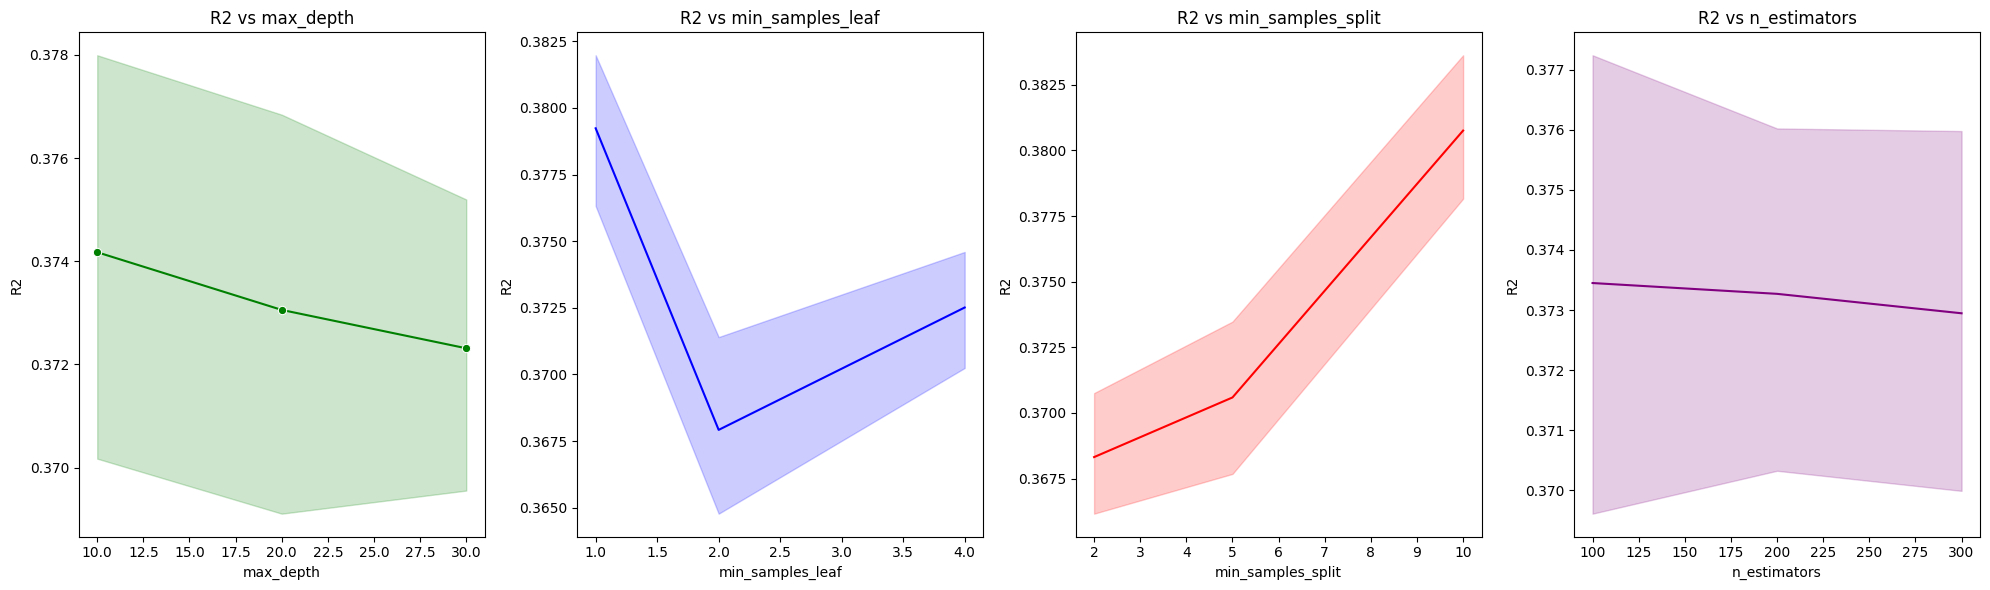

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv.copy()

# Extraer los valores de 'max_depth', 'min_samples_leaf', 'min_samples_split' y 'n_estimators' de los parámetros
knn_df['max_depth'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['max_depth'])
knn_df['min_samples_leaf'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_leaf', None))
knn_df['min_samples_split'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_split', None))
knn_df['n_estimators'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('n_estimators', None))

# Graficar la tendencia del MSE en función de 'max_depth', 'min_samples_leaf', 'min_samples_split' y 'n_estimators'
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.lineplot(x='max_depth', y='R2', data=knn_df, marker='o', color='green')
plt.title('R2 vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('R2')

plt.subplot(1, 4, 2)
sns.lineplot(x='min_samples_leaf', y='R2', data=knn_df, color='blue')
plt.title('R2 vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('R2')

plt.subplot(1, 4, 3)
sns.lineplot(x='min_samples_split', y='R2', data=knn_df, color='red')
plt.title('R2 vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R2')

plt.subplot(1, 4, 4)
sns.lineplot(x='n_estimators', y='R2', data=knn_df, color='purple')
plt.title('R2 vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


Árbol de Decisión (DecisionTreeRegressor)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data_df.drop(columns=['LEC_EXITOSA'])
y = data_df['LEC_EXITOSA']

# Separando entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiendo el modelo Árbol de Decisión
dt = DecisionTreeRegressor()

# Definiendo los hiperparámetros a probar
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

results_df = pd.DataFrame(columns=['mean_test_score', 'params', 'MSE', 'R2'])

grid = GridSearchCV(dt, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Iterar sobre los resultados y guardar en el DataFrame
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    dt_model = DecisionTreeRegressor(**params)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Crear un DataFrame temporal con los resultados de esta iteración
    temp_df = pd.DataFrame({
        'mean_test_score': [mean_score],
        'params': [params],
        'MSE': [mse],
        'R2': [r2]
    })
    
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros:', grid.best_params_)

# Mostrar los resultados completos
print(results_df)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3388\2437943068.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
    mean_test_score                                             params  \
0          0.534707  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
1          0.502068  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
2          0.532013  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
3          0.497647  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
4          0.560892  {'max_depth': None, 'min_samples_leaf': 2, 'mi...   
..              ...                                                ...   
95         0.574542  {'max_depth': 40, 'min_samples_leaf': 6, 'min_...   
96         0.489322  {'max_depth': 40, 'min_samples_leaf': 8, 'min_...   
97         0.492087  {'max_depth': 40, 'min_samples_leaf': 8, 'min_...   
98         0.492087  {'max_depth': 40, 'min_samples_leaf': 8, 'min_...   
99         0.492087  {'max_depth': 40, 'min_samples_leaf': 8, 'min_...   

         MSE       

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
results_df_csv = pd.read_csv('D:\TesisFinalJulio\_resultados_modelo_DecisionTreeRegressor.csv', sep=',')

In [44]:
results_df_csv

,mean_test_score,params,MSE,R2
0,0.534707,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.040000,0.385561
1,0.502068,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.035556,0.453832
2,0.532013,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.036432,0.440361
3,0.497647,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.034800,0.465441
4,0.560892,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.038056,0.415429
...,...,...,...,...
95,0.574542,"{'max_depth': 40, 'min_samples_leaf': 6, 'min_...",0.041196,0.367187
96,0.492087,"{'max_depth': 40, 'min_samples_leaf': 8, 'min_...",0.043377,0.333692
97,0.492087,"{'max_depth': 40, 'min_samples_leaf': 8, 'min_...",0.043377,0.333692
98,0.492087,"{'max_depth': 40, 'min_samples_leaf': 8, 'min_...",0.043377,0.333692


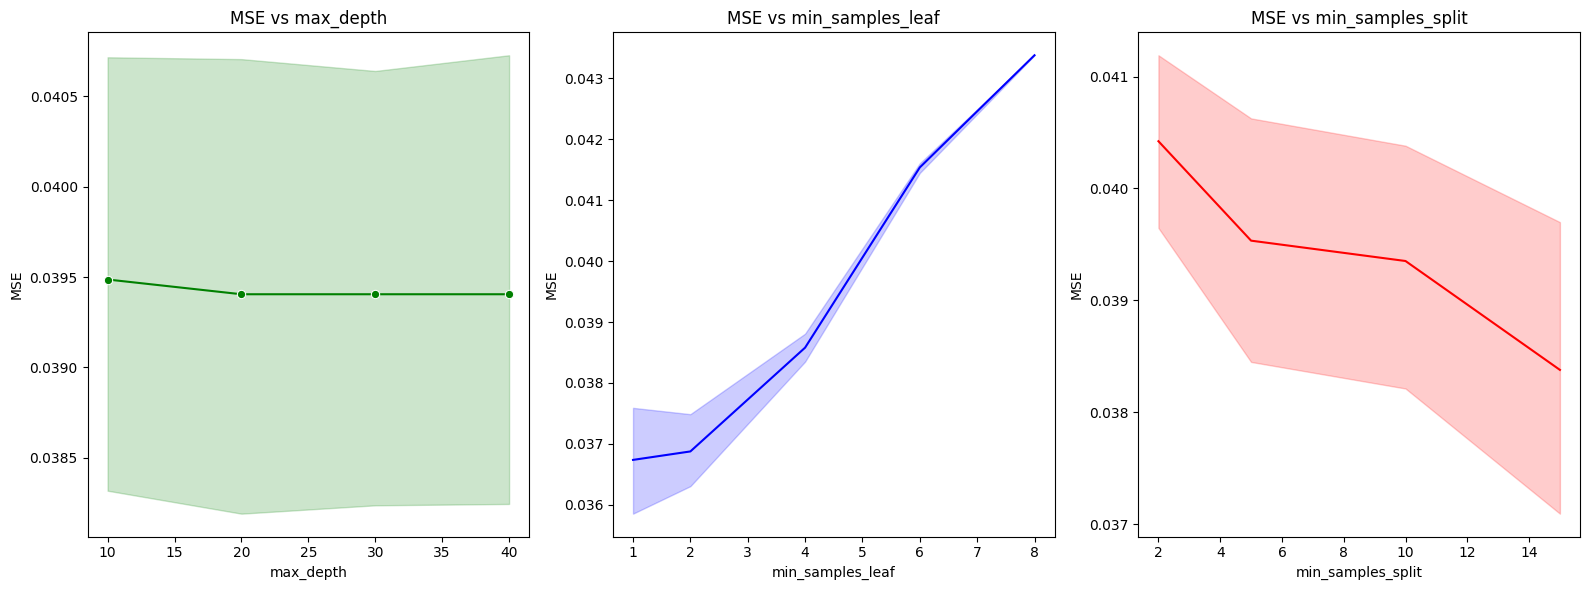

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv.copy()

# Extraer los valores de 'n_neighbors', 'p' y 'weights' de los parámetros
knn_df['max_depth'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['max_depth'])
knn_df['min_samples_leaf'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_leaf', None))
knn_df['min_samples_split'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_split', None))

# Graficar la tendencia del MSE en función de 'n_neighbors', 'p' y 'weights'
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x='max_depth', y='MSE', data=knn_df, marker='o', color='green')
plt.title('MSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
sns.lineplot(x='min_samples_leaf', y='MSE', data=knn_df, color='blue')
plt.title('MSE vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
sns.lineplot(x='min_samples_split', y='MSE', data=knn_df, color='red')
plt.title('MSE vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


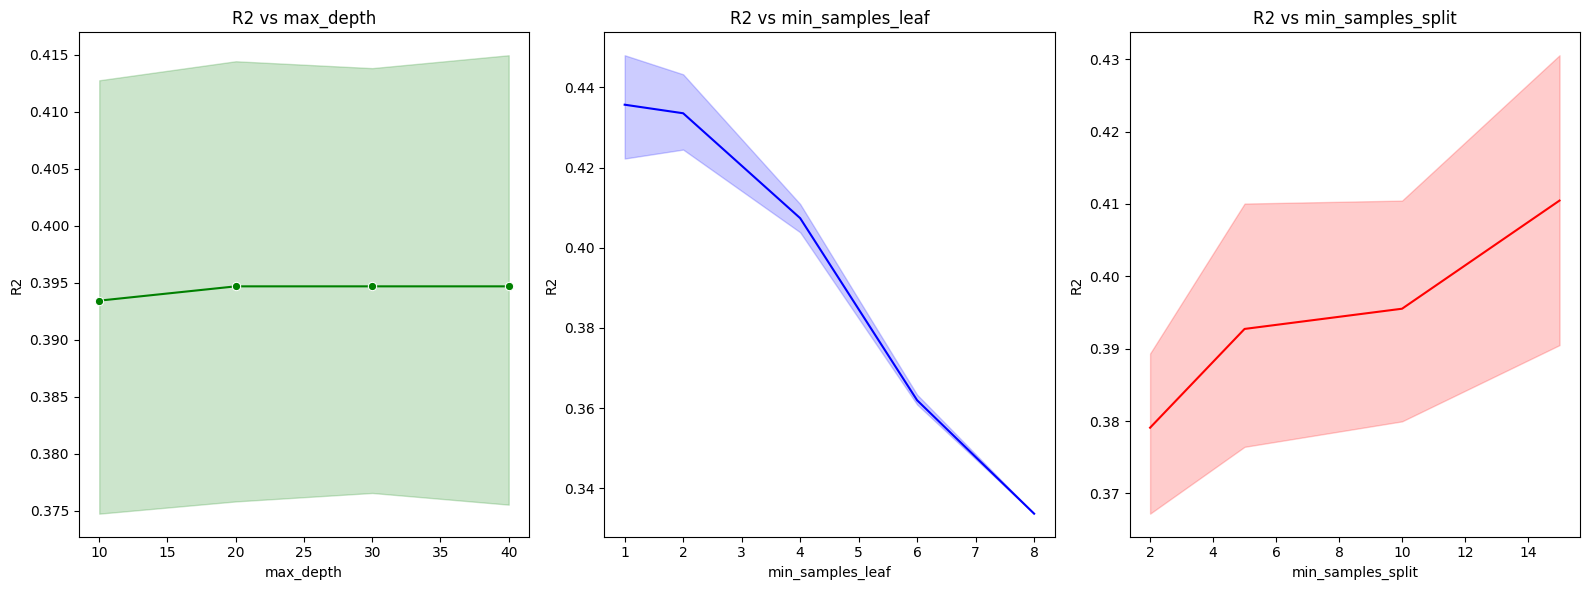

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

knn_df = results_df_csv.copy()

# Extraer los valores de 'n_neighbors', 'p' y 'weights' de los parámetros
knn_df['max_depth'] = knn_df['params'].apply(lambda x: ast.literal_eval(x)['max_depth'])
knn_df['min_samples_leaf'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_leaf', None))
knn_df['min_samples_split'] = knn_df['params'].apply(lambda x: ast.literal_eval(x).get('min_samples_split', None))

# Graficar la tendencia del MSE en función de 'n_neighbors', 'p' y 'weights'
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x='max_depth', y='R2', data=knn_df, marker='o', color='green')
plt.title('R2 vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('R2')

plt.subplot(1, 3, 2)
sns.lineplot(x='min_samples_leaf', y='R2', data=knn_df, color='blue')
plt.title('R2 vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('R2')

plt.subplot(1, 3, 3)
sns.lineplot(x='min_samples_split', y='R2', data=knn_df, color='red')
plt.title('R2 vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R2')

plt.tight_layout()
plt.show()